<a href="https://colab.research.google.com/github/Mdrahamann/UK-Housing-Market-Analysis-Price-Prediction-3-Month-ETL-Project-/blob/main/UK_Housing_Market_Analysis_%26_Price_Prediction_(3%E2%80%91Month_ETL_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [7]:
from google.colab import files
uploaded = files.upload()


Saving November 2025 data.csv to November 2025 data.csv
Saving October 2025 data.csv to October 2025 data.csv
Saving September 2025 data.csv to September 2025 data.csv


Load all 3 monthly files

In [8]:
import pandas as pd

files = [
    "September 2025 data.csv",
    "October 2025 data.csv",
    "November 2025 data.csv"
]

df_list = []

for f in files:
    temp_df = pd.read_csv(f)
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)
df.head()


,{402A3A65-7271-A7DF-E063-4804A8C0B80D},332995,2021-11-29 00:00,RM20 3DF,T,N,F,59,Unnamed: 8,DOVESTONE CLOSE,...,ESSEX,{44F406B6-0F92-1095-E063-4704A8C048D4},175500,2021-11-15 00:00,CM1 6YL,L,30,AZALEA COURT,CHELMSFORD,CHELMSFORD.1
0,{402A3A65-72DF-A7DF-E063-4804A8C0B80D},399000.0,2021-08-02 00:00,SS14 3TZ,D,Y,F,10,NaN,PANKHURST DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{402A3A65-72EE-A7DF-E063-4804A8C0B80D},560000.0,2021-03-22 00:00,CM14 4DS,F,Y,L,"PRIMROSE MEWS, 2",9,PRIMROSE HILL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{402A3A65-730E-A7DF-E063-4804A8C0B80D},385000.0,2021-02-26 00:00,SS17 0GF,T,Y,F,91,NaN,BROOKFIELD DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{402A3A65-7310-A7DF-E063-4804A8C0B80D},123500.0,2021-04-16 00:00,RM19 1NB,F,N,L,HEBERDEN COURT,FLAT 7,WINGROVE DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{402A3A65-7642-A7DF-E063-4804A8C0B80D},479000.0,2021-06-23 00:00,N17 9LS,F,Y,L,HALE WORKS APARTMENTS,FLAT 227,DANELAND WALK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_test = pd.read_csv("September 2025 data.csv", nrows=5)
df_test.columns


Index(['{402A3A65-7271-A7DF-E063-4804A8C0B80D}', '332995', '2021-11-29 00:00',
       'RM20 3DF', 'T', 'N', 'F', '59', 'Unnamed: 8', 'DOVESTONE CLOSE',
       'WEST THURROCK', 'GRAYS', 'THURROCK', 'THURROCK.1', 'A', 'A.1'],
      dtype='object')

In [11]:
df = pd.read_csv("September 2025 data.csv", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{402A3A65-7271-A7DF-E063-4804A8C0B80D},332995,2021-11-29 00:00,RM20 3DF,T,N,F,59,NaN,DOVESTONE CLOSE,WEST THURROCK,GRAYS,THURROCK,THURROCK,A,A
1,{402A3A65-72DF-A7DF-E063-4804A8C0B80D},399000,2021-08-02 00:00,SS14 3TZ,D,Y,F,10,NaN,PANKHURST DRIVE,NaN,BASILDON,BASILDON,ESSEX,A,A
2,{402A3A65-72EE-A7DF-E063-4804A8C0B80D},560000,2021-03-22 00:00,CM14 4DS,F,Y,L,"PRIMROSE MEWS, 2",9,PRIMROSE HILL,NaN,BRENTWOOD,BRENTWOOD,ESSEX,A,A
3,{402A3A65-730E-A7DF-E063-4804A8C0B80D},385000,2021-02-26 00:00,SS17 0GF,T,Y,F,91,NaN,BROOKFIELD DRIVE,NaN,STANFORD-LE-HOPE,THURROCK,THURROCK,A,A
4,{402A3A65-7310-A7DF-E063-4804A8C0B80D},123500,2021-04-16 00:00,RM19 1NB,F,N,L,HEBERDEN COURT,FLAT 7,WINGROVE DRIVE,NaN,PURFLEET-ON-THAMES,THURROCK,THURROCK,A,A


In [12]:
df.columns = [
    "Transaction_unique_identifier",
    "price",
    "Date_of_Transfer",
    "postcode",
    "Property_Type",
    "Old/New",
    "Duration",
    "PAON",
    "SAON",
    "Street",
    "Locality",
    "Town/City",
    "District",
    "County",
    "PPDCategory_Type",
    "Record_Status"
]


In [13]:
df['Date_of_Transfer'] = pd.to_datetime(df['Date_of_Transfer'], errors='coerce')
df = df.dropna(subset=['Date_of_Transfer'])


In [14]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df[df['price'] > 0]


In [15]:
df['year'] = df['Date_of_Transfer'].dt.year
df['month'] = df['Date_of_Transfer'].dt.month
df['quarter'] = df['Date_of_Transfer'].dt.quarter


In [16]:
import pandas as pd

# List your exact filenames
files = [
    "September 2025 data.csv",
    "October 2025 data.csv",
    "November 2025 data.csv"
]

column_names = [
    "Transaction_unique_identifier",
    "price",
    "Date_of_Transfer",
    "postcode",
    "Property_Type",
    "Old/New",
    "Duration",
    "PAON",
    "SAON",
    "Street",
    "Locality",
    "Town/City",
    "District",
    "County",
    "PPDCategory_Type",
    "Record_Status"
]

df_list = []

for f in files:
    temp_df = pd.read_csv(f, header=None)   # No header in your files
    temp_df.columns = column_names          # Assign correct headers
    df_list.append(temp_df)

# Merge all 3 months
df = pd.concat(df_list, ignore_index=True)
df.head()


,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status
0,{402A3A65-7271-A7DF-E063-4804A8C0B80D},332995,2021-11-29 00:00,RM20 3DF,T,N,F,59,NaN,DOVESTONE CLOSE,WEST THURROCK,GRAYS,THURROCK,THURROCK,A,A
1,{402A3A65-72DF-A7DF-E063-4804A8C0B80D},399000,2021-08-02 00:00,SS14 3TZ,D,Y,F,10,NaN,PANKHURST DRIVE,NaN,BASILDON,BASILDON,ESSEX,A,A
2,{402A3A65-72EE-A7DF-E063-4804A8C0B80D},560000,2021-03-22 00:00,CM14 4DS,F,Y,L,"PRIMROSE MEWS, 2",9,PRIMROSE HILL,NaN,BRENTWOOD,BRENTWOOD,ESSEX,A,A
3,{402A3A65-730E-A7DF-E063-4804A8C0B80D},385000,2021-02-26 00:00,SS17 0GF,T,Y,F,91,NaN,BROOKFIELD DRIVE,NaN,STANFORD-LE-HOPE,THURROCK,THURROCK,A,A
4,{402A3A65-7310-A7DF-E063-4804A8C0B80D},123500,2021-04-16 00:00,RM19 1NB,F,N,L,HEBERDEN COURT,FLAT 7,WINGROVE DRIVE,NaN,PURFLEET-ON-THAMES,THURROCK,THURROCK,A,A


In [17]:
# Convert date column
df['Date_of_Transfer'] = pd.to_datetime(df['Date_of_Transfer'], errors='coerce')
df = df.dropna(subset=['Date_of_Transfer'])

# Convert price to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df[df['price'] > 0]

# Remove rows missing key info
df = df.dropna(subset=['postcode', 'Property_Type'])


In [18]:
df['year'] = df['Date_of_Transfer'].dt.year
df['month'] = df['Date_of_Transfer'].dt.month
df['quarter'] = df['Date_of_Transfer'].dt.quarter


In [19]:
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 294820 entries, 0 to 295788
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Transaction_unique_identifier  294820 non-null  object        
 1   price                          294820 non-null  int64         
 2   Date_of_Transfer               294820 non-null  datetime64[ns]
 3   postcode                       294820 non-null  object        
 4   Property_Type                  294820 non-null  object        
 5   Old/New                        294820 non-null  object        
 6   Duration                       294820 non-null  object        
 7   PAON                           294820 non-null  object        
 8   SAON                           38245 non-null   object        
 9   Street                         289640 non-null  object        
 10  Locality                       114699 non-null  object        
 11  Town/

,price,Date_of_Transfer,year,month,quarter
count,2.948200e+05,294820,294820.000000,294820.000000,294820.000000
mean,4.182654e+05,2025-02-09 21:14:28.776881408,2024.477963,8.058259,3.004786
min,1.000000e+00,1995-01-12 00:00:00,1995.000000,1.000000,1.000000
25%,1.850000e+05,2025-01-07 00:00:00,2025.000000,6.000000,2.000000
50%,2.850000e+05,2025-08-05 00:00:00,2025.000000,9.000000,3.000000
75%,4.299950e+05,2025-09-26 00:00:00,2025.000000,10.000000,4.000000
max,7.930200e+08,2025-11-28 00:00:00,2025.000000,12.000000,4.000000
std,2.972270e+06,NaN,2.221767,2.885777,1.012642


Price Trend (3‑Month Trend)

<Axes: title={'center': 'Average Price (3‑Month Trend)'}, xlabel='year,month'>

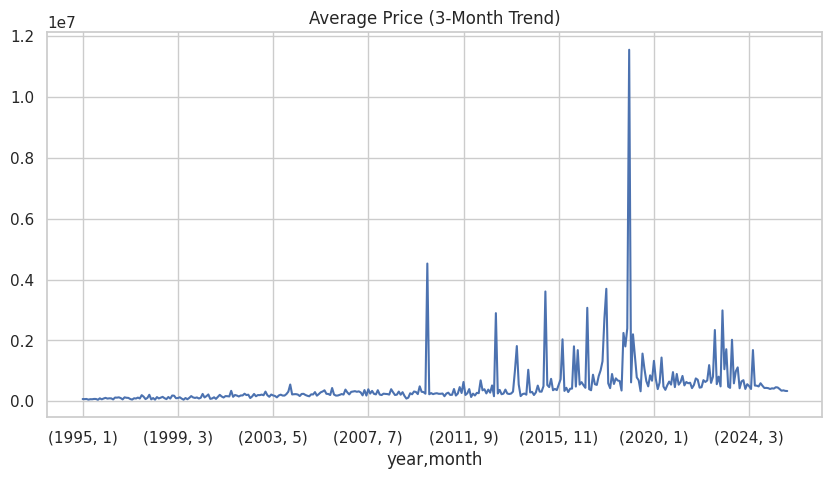

In [20]:
price_by_month = df.groupby(['year','month'])['price'].mean()

price_by_month.plot(kind='line', figsize=(10,5), title="Average Price (3‑Month Trend)")


Price by Property Type

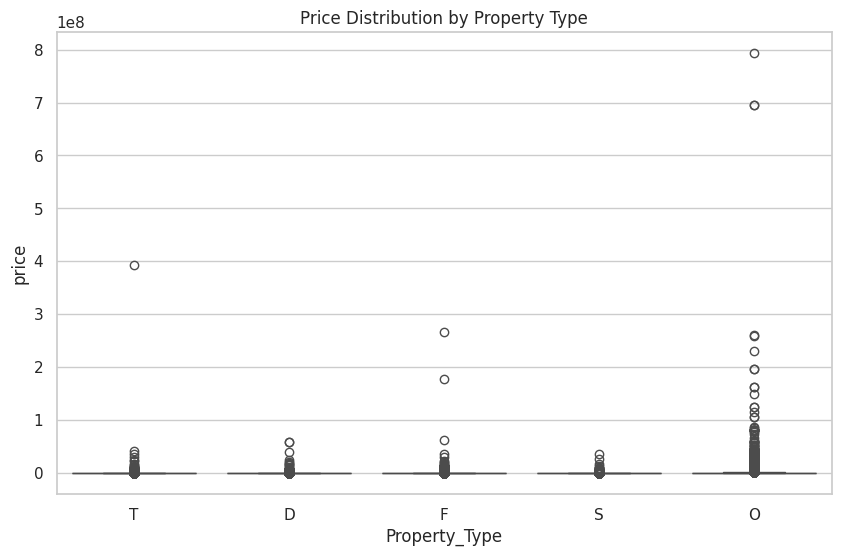

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Property_Type', y='price')
plt.title("Price Distribution by Property Type")
plt.show()


Top 10 Most Expensive Counties

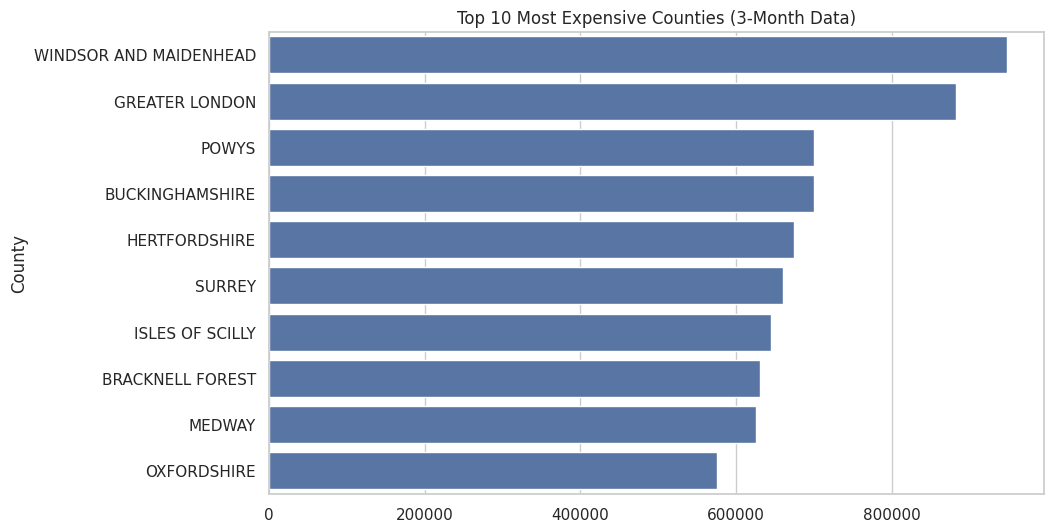

In [22]:
top_counties = df.groupby('County')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_counties.values, y=top_counties.index)
plt.title("Top 10 Most Expensive Counties (3‑Month Data)")
plt.show()


Machine Learning Model
Sample to avoid memory issues

In [23]:
sample_df = df.sample(50000, random_state=42)

X = sample_df[['year','month','quarter','Property_Type','Old/New','Duration']]
y = sample_df['price']

X = pd.get_dummies(X, drop_first=True)


Train/test

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

Evaluate Models

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model):
    preds = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R²:", r2_score(y_test, preds))

print("Linear Regression:")
evaluate(lr)

print("\nRandom Forest:")
evaluate(rf)


Linear Regression:
MAE: 359893.0651407123
RMSE: 4379128.269369887
R²: 0.0024737365398500577

Random Forest:
MAE: 375134.9345390563
RMSE: 5363493.196439589
R²: -0.4963888873351665
